# 回帰木

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import *
from sklearn import datasets, linear_model
import preprocesses
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score

In [32]:
#データの読み込み
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [33]:
new_train=train[preprocesses.train_valiable_list]
new_test=test[preprocesses.test_valiable_list]
new_train=preprocesses.preprocess(new_train)
new_test=preprocesses.preprocess(new_test)
new_train["SalePrice"]=np.log(new_train["SalePrice"])

/Users/Naomi/Desktop/git_clones/MachineLearning/House_Prices/preprocesses.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  t[k]= t[k].map(five_map1)
/Users/Naomi/Desktop/git_clones/MachineLearning/House_Prices/preprocesses.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  t["BsmtExposure"]= t["BsmtExposure"].map(five_map2)
/Users/Naomi/Desktop/git_clones/MachineLearning/House_Prices/preprocesses.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [34]:
from sklearn.tree import DecisionTreeRegressor
RMSE=[]
r2_scores=[]
for max_depth in list(range(1,20)):#parameter change
    model = Pipeline([('poly', PolynomialFeatures(degree=1)),('linear',DecisionTreeRegressor(max_depth=max_depth) )])
    k_fold = KFold(n_splits=5)
    test_MSE = cross_validate(model, new_train.drop(["SalePrice"], axis=1), new_train["SalePrice"], 
                           cv=k_fold, scoring=('r2', 'neg_mean_squared_error'), n_jobs=-1)
    RMSE.append(np.sqrt(np.mean(-test_MSE['test_neg_mean_squared_error'])))
    r2_scores.append(np.mean(test_MSE['test_r2']))

In [36]:
print(RMSE)

[0.29338648327593986, 0.2551130691111247, 0.2271244943443391, 0.2032477561423465, 0.19873101059154374, 0.19323040409176764, 0.1906653336316531, 0.19289024231895568, 0.1924954206182176, 0.1922506917423848, 0.19773876606793386, 0.19739566151089538, 0.19697852739900099, 0.19702800397340378, 0.1991532766153912, 0.19540091175009464, 0.19592199529028415, 0.19372718408582584, 0.1984053960405235]


In [37]:
print(r2_scores)

[0.45769478602301944, 0.5901378973096506, 0.674577380953058, 0.740017984543662, 0.7507970156110327, 0.7639455764485934, 0.7706650035889039, 0.7655970388824522, 0.7663986647043137, 0.7668408458793499, 0.7525302371976725, 0.7535991553387852, 0.7543752547312691, 0.754547100670167, 0.7495300737209047, 0.7590913581394578, 0.7574422606034051, 0.7629758062010576, 0.7512902045800723]


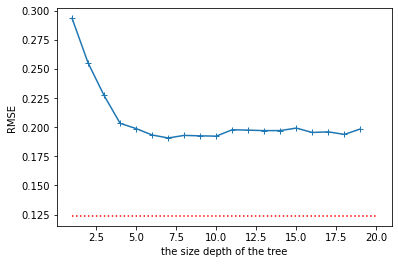

In [39]:
plt.plot(list(range(1,20)),RMSE,"+-")
plt.hlines([0.12381220676923944], 1,20, "red", linestyles='dotted')
plt.xlabel("the size depth of the tree")
plt.ylabel("RMSE")
plt.show()

depth=7あたりで最も良さそう。
depth=4あたりで木を見てみる

In [42]:
from sklearn.tree import export_graphviz
regr_tree=DecisionTreeRegressor(max_depth=4)
regr_tree.fit(new_train.drop(["SalePrice"],axis=1),new_train["SalePrice"])
export_graphviz(regr_tree, out_file="mytree.dot", feature_names =new_train.drop(["SalePrice"],axis=1).columns)

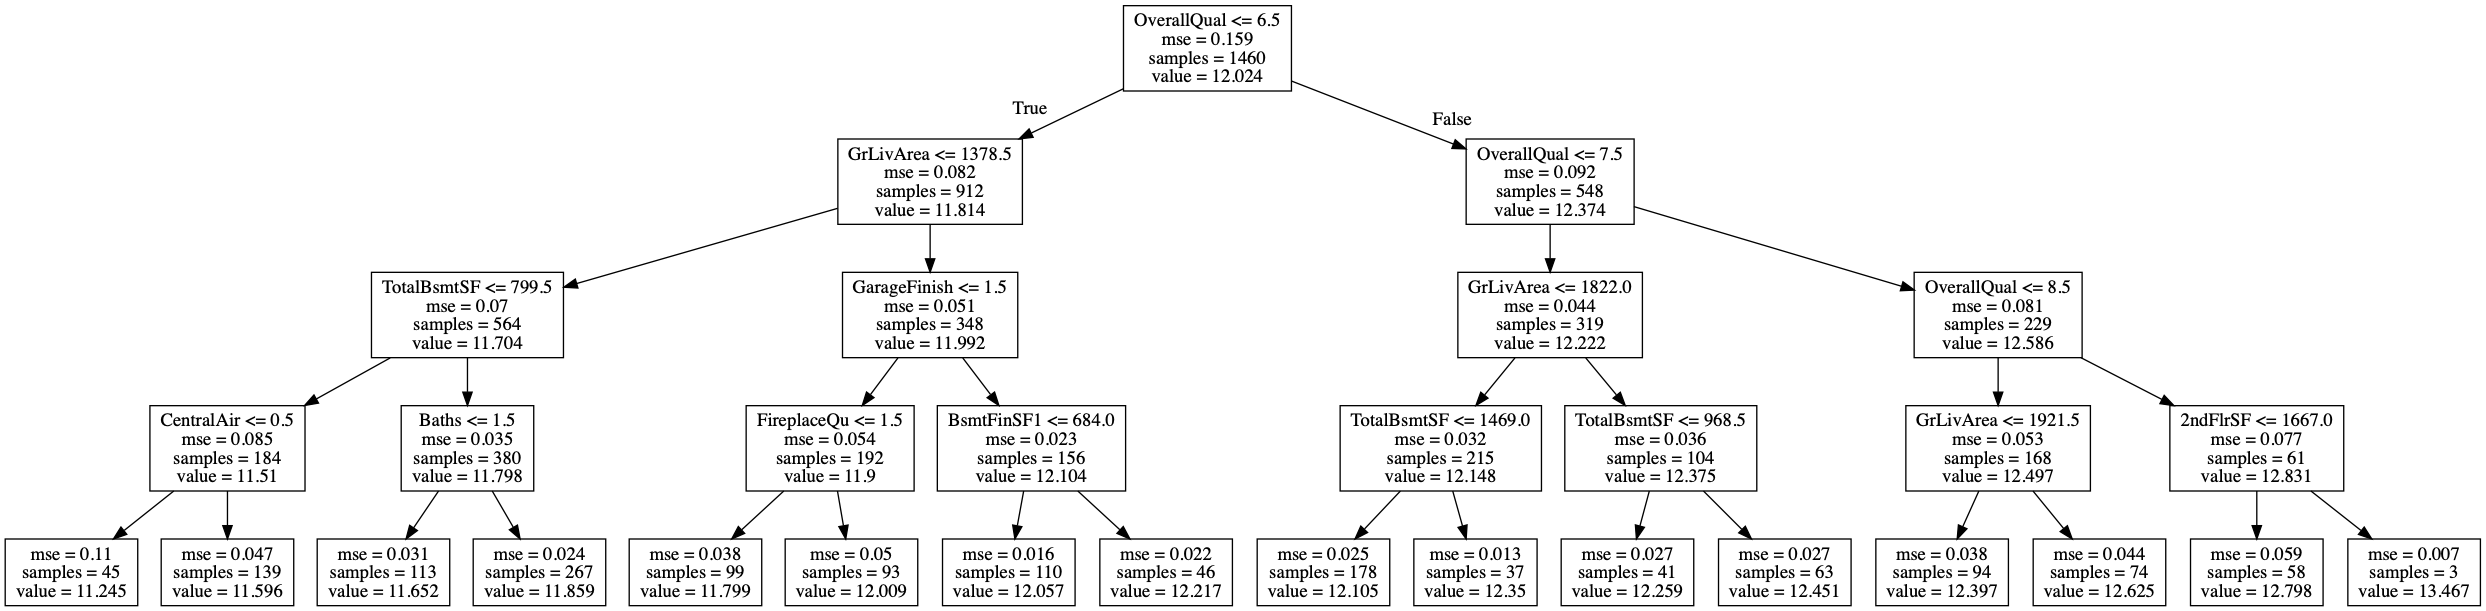

OverallQualはとても大切そう（それはそうという感じがする）

# 提出

In [56]:
#Ridge
model = DecisionTreeRegressor(max_depth=7) 
model.fit(new_train.drop(["SalePrice"],axis=1),new_train["SalePrice"])
# make predictions
yt =model.predict(new_test)
output_df=new_test.copy()
output_df["SalePrice"] = np.exp(yt)#値段に戻す
output_df["Id"]=test["Id"]
output_df.to_csv("output.csv",index=False, columns=['Id','SalePrice'])
!head output.csv

Id,SalePrice
1461,125767.51724564847
1462,164034.24002393364
1463,183142.32002546565
1464,174084.01176057407
1465,235139.64990789845
1466,194429.5667441938
1467,158732.3245701451
1468,174084.01176057407
1469,195928.14711282717


In [57]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f output.csv -m  "RegressionTree" 

100%|██████████████████████████████████████| 33.8k/33.8k [00:02<00:00, 11.9kB/s]
Successfully submitted to House Prices: Advanced Regression Techniques

0.20612。K-neighborよりは良かったがそれ以外のすべてと比べて悪かった。